In [1]:
import pyrqa
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy

In [2]:
data = pd.read_csv('./data/final_final.csv')

In [3]:
def time_dif(a, b):
    dif = 0
    dif += int(b[11:13]) * 3600 - int(a[11:13]) * 3600
    dif += int(b[14:16]) * 60 - int(a[14:16]) * 60
    dif += int(b[17:19]) - int(a[17:19])
    return dif

In [4]:
time_dif(data.event_start_time[0], data.event_start_time[20])

127

In [5]:
data[data.isna().any(axis=1)]

Unnamed: 0      session_id mellon_id  \
938          938  7298_Professor    178633   
941          941  7298_Professor    178633   
944          944  7298_Professor    178633   
949          949  7298_Professor    178633   
950          950  7298_Professor    178633   
...          ...             ...       ...   
7356        7356  7371_candidate  Isabella   
7357        7357  7371_candidate  Isabella   
7361        7361  7371_candidate  Isabella   
7363        7363  7371_candidate  Isabella   
7365        7365  7371_candidate  Isabella   

                                              player_id  \
938   {'userID1': '201680', 'nickname1': 'Isabel', '...   
941   {'userID1': '201680', 'nickname1': 'Isabel', '...   
944   {'userID1': '201680', 'nickname1': 'Isabel', '...   
949   {'userID1': '201680', 'nickname1': 'Isabel', '...   
950   {'userID1': '201680', 'nickname1': 'Isabel', '...   
...                                                 ...   
7356  {'userID1': '187876', 'nickname1': 'Sabrina', ...   
7357  {'userID1': '187876', 'nickname1': 'Sabrina', ...   
7361  {'userID1': '187876', 'nickname1': 'Sabrina', ...   
7363  {'userID1': '187876', 'nickname1': 'Sabrina', ...   
7365  {'userID1': '187876', 'nickname1': 'Sabrina', ...   

                                           event_result       task  \
938                                                  hi  Professor   
941                                                yeah  Professor   
944                                undeclared pharm sci  Professor   
949                         he/she was in my last group  Professor   
950                                    and had problems  Professor   
...                                                 ...        ...   
7356  because A has 3 more major flaws, and their po...  candidate   
7357  We don't really care that they are from florid...  candidate   
7361  yeah overall they didn't seem like they would ...  candidate   
7363                                                yes  candidate   
7365                  okay, we're good to submit then ?  candidate   

     Primary code            event_start_time  revise_score  high_performance  \
938            SMC  2019-09-28 17:17:34+00:00           0.0                 0   
941            SMC  2019-09-28 17:17:46+00:00           0.0                 0   
944            SMC  2019-09-28 17:17:58+00:00           0.0                 0   
949            SMC  2019-09-28 17:18:25+00:00           0.0                 0   
950            SMC  2019-09-28 17:18:28+00:00           0.0                 0   
...            ...                        ...           ...               ...   
7356           CRF  2019-10-03 23:17:03+00:00           0.0                 0   
7357           SSI  2019-10-03 23:17:22+00:00           0.0                 0   
7361           SSI  2019-10-03 23:18:21+00:00           0.0                 0   
7363            SN  2019-10-03 23:18:38+00:00           0.0                 0   
7365            CE  2019-10-03 23:18:54+00:00           0.0                 0   

      female_members  female_maj gender ethnicity application_status  \
938                2           0    NaN       NaN                NaN   
941                2           0    NaN       NaN                NaN   
944                2           0    NaN       NaN                NaN   
949                2           0    NaN       NaN                NaN   
950                2           0    NaN       NaN                NaN   
...              ...         ...    ...       ...                ...   
7356               3           1    NaN       NaN                NaN   
7357               3           1    NaN       NaN                NaN   
7361               3           1    NaN       NaN                NaN   
7363               3           1    NaN       NaN                NaN   
7365               3           1    NaN       NaN                NaN   

      first_generation  urm first_language  
938                N

In [7]:
data.ethnicity = data.ethnicity.replace('Unknown', 'Unknown / declined to state')

In [8]:
data = data.fillna('Unknown / declined to state')

In [9]:
data.head()

Unnamed: 0       session_id mellon_id  \
0           0  7298_PartyVenue    173442   
1           1  7298_PartyVenue    202618   
2           2  7298_PartyVenue    163093   
3           3  7298_PartyVenue    173442   
4           4  7298_PartyVenue    202618   

                                           player_id  \
0  {'userID1': '202618', 'nickname1': 'bean boi',...   
1  {'userID1': '202618', 'nickname1': 'bean boi',...   
2  {'userID1': '202618', 'nickname1': 'bean boi',...   
3  {'userID1': '202618', 'nickname1': 'bean boi',...   
4  {'userID1': '202618', 'nickname1': 'bean boi',...   

                event_result        task Primary code   \
0             what's up lads  PartyVenue           SMC   
1                      hello  PartyVenue           SMC   
2  hi its too early for this  PartyVenue           SMC   
3    bean boi i like ur name  PartyVenue           SMC   
4                     thanks  PartyVenue           SMC   

            event_start_time  revise_score  high_performance  female_members  \
0  2019-09-28 17:11:18+00:00           0.0                 0               4   
1  2019-09-28 17:11:26+00:00           0.0                 0               4   
2  2019-09-28 17:11:29+00:00           0.0                 0               4   
3  2019-09-28 17:11:32+00:00           0.0                 0               4   
4  2019-09-28 17:11:35+00:00           0.0                 0               4   

   female_maj gender                    ethnicity application_status  \
0           1      F  Unknown / declined to state          Sophomore   
1           1      F       Asian / Asian American           Freshman   
2           1      F       Asian / Asian American           Freshman   
3           1      F  Unknown / declined to state          Sophomore   
4           1      F       Asian / Asian American           Freshman   

  first_generation  urm       first_language  
0              0.0  0.0         English only  
1              1.0  0.0          Non-English  
2              1.0  0.0  English/non-English  
3              0.0  0.0         English only  
4              1.0  0.0          Non-English

In [10]:
data.to_csv('./data/final_final_final.csv')

In [8]:
len(data.session_id.unique())

129

In [9]:
a = data['Primary code '].unique()

In [10]:
a

array(['SMC', 'SSI', 'CM', 'SESU', 'CP', 'CE', 'SN', 'CRF', 'EM', 'TD'],
      dtype=object)

In [11]:
data = data[data['Primary code '] != 'EM']
data = data[data['Primary code '] != 'TD']

In [12]:
from numpy import asarray
from sklearn.preprocessing import LabelEncoder
# define data
a = data['Primary code ']
# define one hot encoding
encoder = LabelEncoder()
# transform data
encoder.fit(a)

LabelEncoder()

In [13]:
codes_list = data.groupby(['session_id'])['Primary code '].apply(list)

In [14]:
codes_list[:5]

session_id
7283_Professor    [SMC, SMC, SMC, SMC, SMC, SMC, SMC, SMC, SMC, ...
7285_Professor    [SMC, SMC, SMC, SMC, SMC, SMC, SMC, SMC, SMC, ...
7287_Professor    [SMC, SMC, SMC, SMC, SESU, CE, SSI, SMC, SSI, ...
7288_Professor    [SMC, SMC, SMC, CE, SMC, SESU, SSI, SSI, SSI, ...
7289_Professor    [SMC, SMC, SMC, SMC, SESU, SESU, SESU, SESU, S...
Name: Primary code , dtype: object

In [15]:
scores = np.array(data.groupby(['session_id'])['revise_score'].mean()).astype(int)
full_score = (scores == 2).astype(int)

In [16]:
# from pyrqa.analysis_type import Cross
# from pyrqa.time_series import TimeSeries
# from pyrqa.settings import Settings
# from pyrqa.analysis_type import Classic
# from pyrqa.neighbourhood import FixedRadius
# from pyrqa.metric import EuclideanMetric
# from pyrqa.computation import RQAComputation
# from pyrqa.computation import RPComputation
# from pyrqa.image_generator import ImageGenerator

# x = []


# for i in range(len(codes_list)):
#     data_points_x = encoder.transform(codes_list[i])
#     time_series_x = TimeSeries(data_points_x,
#                                embedding_dimension=1,
#                                time_delay=0)
#     time_series = (time_series_x,
#                    time_series_x)
#     settings = Settings(time_series,
#                         analysis_type=Cross,
#                         neighbourhood=FixedRadius(0.5),
#                         similarity_measure=EuclideanMetric,
#                         theiler_corrector=0)
#     computation = RQAComputation.create(settings,
#                                         verbose=False)
#     result = computation.run()
#     result.min_diagonal_line_length = 2
#     result.min_vertical_line_length = 2
#     result.min_white_vertical_line_length = 2
#     #print(result)
#     x.append([result.determinism, result.recurrence_rate, result.entropy_diagonal_lines,
#              result.longest_diagonal_line, result.average_diagonal_line, result.laminarity,
#              result.divergence])
    
# #     computation = RPComputation.create(settings)
# #     result = computation.run()
# #     ImageGenerator.save_recurrence_plot(result.recurrence_matrix_reverse,
# #                                     'plots/{}/{}_{}.png'.format(full_score[i], i, scores[i]))        
    

In [17]:
from pyrqa.time_series import TimeSeries
from pyrqa.settings import Settings
from pyrqa.analysis_type import Classic
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation

x = []


for i in range(len(codes_list)):

    data_points = encoder.transform(codes_list[i])
    time_series = TimeSeries(data_points,
                             embedding_dimension=1,
                             time_delay=0)
    settings = Settings(time_series,
                        analysis_type=Classic,
                        neighbourhood=FixedRadius(0.5),
                        similarity_measure=EuclideanMetric,
                        theiler_corrector=1)
    computation = RQAComputation.create(settings,
                                        verbose=True)
    result = computation.run()
    result.min_diagonal_line_length = 2
    result.min_vertical_line_length = 2
    result.min_white_vertical_line_length = 2
    print(result)
    
    x.append([result.determinism, result.recurrence_rate, result.entropy_diagonal_lines,
             result.longest_diagonal_line, result.average_diagonal_line, result.laminarity,
             result.divergence, len(data_points)])

[Platform 'Apple']
Vendor: Apple
Version: OpenCL 1.2 (Jun 17 2021 15:24:17)
Profile: FULL_PROFILE
Extensions: cl_APPLE_SetMemObjectDestructor cl_APPLE_ContextLoggingFunctions cl_APPLE_clut cl_APPLE_query_kernel_names cl_APPLE_gl_sharing cl_khr_gl_event


[Device 'Apple M1']
Vendor: Intel
Type: 2
Version: OpenCL 1.2 
Profile: FULL_PROFILE
Max Clock Frequency: 2400
Global Mem Size: 8589934592
Address Bits: 64
Max Compute Units: 8
Max Work Group Size: 1024
Max Work Item Dimensions: 3
Max Work Item Sizes: [1024, 1, 1]
Local Mem Size: 32768
Max Mem Alloc Size: 2147483648
Extensions: cl_APPLE_SetMemObjectDestructor cl_APPLE_ContextLoggingFunctions cl_APPLE_clut cl_APPLE_query_kernel_names cl_APPLE_gl_sharing cl_khr_gl_event cl_khr_fp64 cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_byte_addressable_store cl_khr_int64_base_atomics cl_khr_int64_extended_atomics cl_khr_3d_image_writes cl_khr_image2

RQA Result:

Minimum diagonal line length (L_min): 2
Minimum vertical line length (V_min): 2
Minimum white vertical line length (W_min): 2

Recurrence rate (RR): 0.337868
Determinism (DET): 0.593750
Average diagonal line length (L): 2.714286
Longest diagonal line length (L_max): 4
Divergence (DIV): 0.250000
Entropy diagonal lines (L_entr): 1.034601
Laminarity (LAM): 0.704698
Trapping time (TT): 4.200000
Longest vertical line length (V_max): 5
Entropy vertical lines (V_entr): 0.976894
Average white vertical line length (W): 4.924528
Longest white vertical line length (W_max): 16
Longest white vertical line length inverse (W_div): 0.062500
Entropy white vertical lines (W_entr): 1.564880

Ratio determinism / recurrence rate (DET/RR): 1.757341
Ratio laminarity / determinism (LAM/DET): 1.186860

[Platform 'Apple']
Vendor: Apple
Version: OpenCL 1.2 (Jun 17 2021 15:24:17)
Profile: FULL_PROFILE
Extensions: cl_APPLE_SetMemObjectDestructor cl_APPLE_ContextLoggingFunctions cl_APPLE_clut cl_APPLE_

RQA Result:

Minimum diagonal line length (L_min): 2
Minimum vertical line length (V_min): 2
Minimum white vertical line length (W_min): 2

Recurrence rate (RR): 0.191111
Determinism (DET): 0.463649
Average diagonal line length (L): 2.816667
Longest diagonal line length (L_max): 12
Divergence (DIV): 0.083333
Entropy diagonal lines (L_entr): 1.153273
Laminarity (LAM): 0.589147
Trapping time (TT): 3.619048
Longest vertical line length (V_max): 13
Entropy vertical lines (V_entr): 1.335813
Average white vertical line length (W): 9.243004
Longest white vertical line length (W_max): 77
Longest white vertical line length inverse (W_div): 0.012987
Entropy white vertical lines (W_entr): 2.466934

Ratio determinism / recurrence rate (DET/RR): 2.426069
Ratio laminarity / determinism (LAM/DET): 1.270676

[Platform 'Apple']
Vendor: Apple
Version: OpenCL 1.2 (Jun 17 2021 15:24:17)
Profile: FULL_PROFILE
Extensions: cl_APPLE_SetMemObjectDestructor cl_APPLE_ContextLoggingFunctions cl_APPLE_clut cl_APPL

RQA Result:

Minimum diagonal line length (L_min): 2
Minimum vertical line length (V_min): 2
Minimum white vertical line length (W_min): 2

Recurrence rate (RR): 0.274376
Determinism (DET): 0.560000
Average diagonal line length (L): 2.153846
Longest diagonal line length (L_max): 3
Divergence (DIV): 0.333333
Entropy diagonal lines (L_entr): 0.429323
Laminarity (LAM): 0.776860
Trapping time (TT): 2.937500
Longest vertical line length (V_max): 4
Entropy vertical lines (V_entr): 1.043353
Average white vertical line length (W): 5.629630
Longest white vertical line length (W_max): 18
Longest white vertical line length inverse (W_div): 0.055556
Entropy white vertical lines (W_entr): 1.751064

Ratio determinism / recurrence rate (DET/RR): 2.040992
Ratio laminarity / determinism (LAM/DET): 1.387249

[Platform 'Apple']
Vendor: Apple
Version: OpenCL 1.2 (Jun 17 2021 15:24:17)
Profile: FULL_PROFILE
Extensions: cl_APPLE_SetMemObjectDestructor cl_APPLE_ContextLoggingFunctions cl_APPLE_clut cl_APPLE_

RQA Result:

Minimum diagonal line length (L_min): 2
Minimum vertical line length (V_min): 2
Minimum white vertical line length (W_min): 2

Recurrence rate (RR): 0.312653
Determinism (DET): 0.557471
Average diagonal line length (L): 2.487179
Longest diagonal line length (L_max): 7
Divergence (DIV): 0.142857
Entropy diagonal lines (L_entr): 0.835593
Laminarity (LAM): 0.718016
Trapping time (TT): 3.021978
Longest vertical line length (V_max): 4
Entropy vertical lines (V_entr): 1.044930
Average white vertical line length (W): 5.429577
Longest white vertical line length (W_max): 31
Longest white vertical line length inverse (W_div): 0.032258
Entropy white vertical lines (W_entr): 1.662483

Ratio determinism / recurrence rate (DET/RR): 1.783035
Ratio laminarity / determinism (LAM/DET): 1.287987

[Platform 'Apple']
Vendor: Apple
Version: OpenCL 1.2 (Jun 17 2021 15:24:17)
Profile: FULL_PROFILE
Extensions: cl_APPLE_SetMemObjectDestructor cl_APPLE_ContextLoggingFunctions cl_APPLE_clut cl_APPLE_

[Platform 'Apple']
Vendor: Apple
Version: OpenCL 1.2 (Jun 17 2021 15:24:17)
Profile: FULL_PROFILE
Extensions: cl_APPLE_SetMemObjectDestructor cl_APPLE_ContextLoggingFunctions cl_APPLE_clut cl_APPLE_query_kernel_names cl_APPLE_gl_sharing cl_khr_gl_event


[Device 'Apple M1']
Vendor: Intel
Type: 2
Version: OpenCL 1.2 
Profile: FULL_PROFILE
Max Clock Frequency: 2400
Global Mem Size: 8589934592
Address Bits: 64
Max Compute Units: 8
Max Work Group Size: 1024
Max Work Item Dimensions: 3
Max Work Item Sizes: [1024, 1, 1]
Local Mem Size: 32768
Max Mem Alloc Size: 2147483648
Extensions: cl_APPLE_SetMemObjectDestructor cl_APPLE_ContextLoggingFunctions cl_APPLE_clut cl_APPLE_query_kernel_names cl_APPLE_gl_sharing cl_khr_gl_event cl_khr_fp64 cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_byte_addressable_store cl_khr_int64_base_atomics cl_khr_int64_extended_atomics cl_khr_3d_image_writes cl_khr_image2

RQA Result:

Minimum diagonal line length (L_min): 2
Minimum vertical line length (V_min): 2
Minimum white vertical line length (W_min): 2

Recurrence rate (RR): 0.207934
Determinism (DET): 0.498258
Average diagonal line length (L): 2.860000
Longest diagonal line length (L_max): 9
Divergence (DIV): 0.111111
Entropy diagonal lines (L_entr): 1.209010
Laminarity (LAM): 0.658188
Trapping time (TT): 3.112782
Longest vertical line length (V_max): 10
Entropy vertical lines (V_entr): 1.138419
Average white vertical line length (W): 8.106383
Longest white vertical line length (W_max): 54
Longest white vertical line length inverse (W_div): 0.018519
Entropy white vertical lines (W_entr): 2.209046

Ratio determinism / recurrence rate (DET/RR): 2.396232
Ratio laminarity / determinism (LAM/DET): 1.320978

[Platform 'Apple']
Vendor: Apple
Version: OpenCL 1.2 (Jun 17 2021 15:24:17)
Profile: FULL_PROFILE
Extensions: cl_APPLE_SetMemObjectDestructor cl_APPLE_ContextLoggingFunctions cl_APPLE_clut cl_APPLE

RQA Result:

Minimum diagonal line length (L_min): 2
Minimum vertical line length (V_min): 2
Minimum white vertical line length (W_min): 2

Recurrence rate (RR): 0.228430
Determinism (DET): 0.477987
Average diagonal line length (L): 2.533333
Longest diagonal line length (L_max): 5
Divergence (DIV): 0.200000
Entropy diagonal lines (L_entr): 0.953866
Laminarity (LAM): 0.732272
Trapping time (TT): 3.085366
Longest vertical line length (V_max): 5
Entropy vertical lines (V_entr): 1.156342
Average white vertical line length (W): 8.166052
Longest white vertical line length (W_max): 37
Longest white vertical line length inverse (W_div): 0.027027
Entropy white vertical lines (W_entr): 2.389676

Ratio determinism / recurrence rate (DET/RR): 2.092492
Ratio laminarity / determinism (LAM/DET): 1.531990

[Platform 'Apple']
Vendor: Apple
Version: OpenCL 1.2 (Jun 17 2021 15:24:17)
Profile: FULL_PROFILE
Extensions: cl_APPLE_SetMemObjectDestructor cl_APPLE_ContextLoggingFunctions cl_APPLE_clut cl_APPLE_

RQA Result:

Minimum diagonal line length (L_min): 2
Minimum vertical line length (V_min): 2
Minimum white vertical line length (W_min): 2

Recurrence rate (RR): 0.274539
Determinism (DET): 0.523810
Average diagonal line length (L): 2.834356
Longest diagonal line length (L_max): 6
Divergence (DIV): 0.166667
Entropy diagonal lines (L_entr): 1.227901
Laminarity (LAM): 0.686349
Trapping time (TT): 4.087097
Longest vertical line length (V_max): 7
Entropy vertical lines (V_entr): 1.736197
Average white vertical line length (W): 8.269871
Longest white vertical line length (W_max): 61
Longest white vertical line length inverse (W_div): 0.016393
Entropy white vertical lines (W_entr): 2.387462

Ratio determinism / recurrence rate (DET/RR): 1.907961
Ratio laminarity / determinism (LAM/DET): 1.310302

[Platform 'Apple']
Vendor: Apple
Version: OpenCL 1.2 (Jun 17 2021 15:24:17)
Profile: FULL_PROFILE
Extensions: cl_APPLE_SetMemObjectDestructor cl_APPLE_ContextLoggingFunctions cl_APPLE_clut cl_APPLE_

RQA Result:

Minimum diagonal line length (L_min): 2
Minimum vertical line length (V_min): 2
Minimum white vertical line length (W_min): 2

Recurrence rate (RR): 0.211806
Determinism (DET): 0.340909
Average diagonal line length (L): 2.272727
Longest diagonal line length (L_max): 4
Divergence (DIV): 0.250000
Entropy diagonal lines (L_entr): 0.645196
Laminarity (LAM): 0.467213
Trapping time (TT): 2.303030
Longest vertical line length (V_max): 4
Entropy vertical lines (V_entr): 0.661613
Average white vertical line length (W): 5.810811
Longest white vertical line length (W_max): 28
Longest white vertical line length inverse (W_div): 0.035714
Entropy white vertical lines (W_entr): 2.129284

Ratio determinism / recurrence rate (DET/RR): 1.609538
Ratio laminarity / determinism (LAM/DET): 1.370492

[Platform 'Apple']
Vendor: Apple
Version: OpenCL 1.2 (Jun 17 2021 15:24:17)
Profile: FULL_PROFILE
Extensions: cl_APPLE_SetMemObjectDestructor cl_APPLE_ContextLoggingFunctions cl_APPLE_clut cl_APPLE_

RQA Result:

Minimum diagonal line length (L_min): 2
Minimum vertical line length (V_min): 2
Minimum white vertical line length (W_min): 2

Recurrence rate (RR): 0.260000
Determinism (DET): 0.000000
Average diagonal line length (L): nan
Longest diagonal line length (L_max): 1
Divergence (DIV): 1.000000
Entropy diagonal lines (L_entr): 0.000000
Laminarity (LAM): 0.615385
Trapping time (TT): 2.000000
Longest vertical line length (V_max): 2
Entropy vertical lines (V_entr): 0.000000
Average white vertical line length (W): 3.882353
Longest white vertical line length (W_max): 9
Longest white vertical line length inverse (W_div): 0.111111
Entropy white vertical lines (W_entr): 1.203332

Ratio determinism / recurrence rate (DET/RR): 0.000000
Ratio laminarity / determinism (LAM/DET): inf

[Platform 'Apple']
Vendor: Apple
Version: OpenCL 1.2 (Jun 17 2021 15:24:17)
Profile: FULL_PROFILE
Extensions: cl_APPLE_SetMemObjectDestructor cl_APPLE_ContextLoggingFunctions cl_APPLE_clut cl_APPLE_query_kerne

RQA Result:

Minimum diagonal line length (L_min): 2
Minimum vertical line length (V_min): 2
Minimum white vertical line length (W_min): 2

Recurrence rate (RR): 0.235000
Determinism (DET): 0.297297
Average diagonal line length (L): 2.750000
Longest diagonal line length (L_max): 4
Divergence (DIV): 0.250000
Entropy diagonal lines (L_entr): 1.039721
Laminarity (LAM): 0.574468
Trapping time (TT): 3.000000
Longest vertical line length (V_max): 5
Entropy vertical lines (V_entr): 0.636514
Average white vertical line length (W): 5.875000
Longest white vertical line length (W_max): 16
Longest white vertical line length inverse (W_div): 0.062500
Entropy white vertical lines (W_entr): 1.832389

Ratio determinism / recurrence rate (DET/RR): 1.265095
Ratio laminarity / determinism (LAM/DET): 1.932302

[Platform 'Apple']
Vendor: Apple
Version: OpenCL 1.2 (Jun 17 2021 15:24:17)
Profile: FULL_PROFILE
Extensions: cl_APPLE_SetMemObjectDestructor cl_APPLE_ContextLoggingFunctions cl_APPLE_clut cl_APPLE_

In [18]:
len([time_dif(t[0], t[-1]) for t in list(data.groupby(['session_id'])['event_start_time'].apply(list))])

129

In [19]:
rqa_res = pd.DataFrame(x)
rqa_res['diversity'] = [len(k) for k in data.groupby(['session_id']).ethnicity.unique()]
rqa_res['diversity_bin'] = (rqa_res.diversity >= 3).astype(int)
rqa_res['time'] = [time_dif(t[0], t[-1]) for t in list(data.groupby(['session_id'])['event_start_time'].apply(list))]
rqa_res['high_performance'] = list(data.groupby(['session_id'])['high_performance'].max())
rqa_res['female_majority'] = list(data.groupby(['session_id'])['female_maj'].max())

rqa_res.columns = ["determinism", "recurrence_rate", "entropy", "longest_diagonal_line", "average_diagonal_line", "laminarity",
                 "divergence", "no_messages", "diversity", "diversity_bin", 'time', "high_performance", 'female_majority']

rqa_res['revise_score'] = np.array(data.groupby(['session_id'])['revise_score'].mean())
rqa_res['full_credit'] = (np.array(data.groupby(['session_id'])['revise_score'].mean()) == 2).astype(int)
rqa_res['half_credit'] = (np.array(data.groupby(['session_id'])['revise_score'].mean()) >= 1).astype(int)
rqa_res['task'] = np.array(data.groupby(['session_id'])['task'].max())
rqa_res['task_numeric'] = pd.factorize(rqa_res.task)[0]


In [20]:
rqa_res

determinism  recurrence_rate   entropy  longest_diagonal_line  \
0       0.561449         0.266930  1.083095                      8   
1       0.407480         0.215632  0.768094                      8   
2       0.276596         0.202938  0.655482                      3   
3       0.455988         0.208333  0.711437                      6   
4       0.467005         0.207940  0.755876                      4   
..           ...              ...       ...                    ...   
124     0.339286         0.167658  0.661563                      3   
125     0.413333         0.200000  0.983088                      5   
126     0.523962         0.285467  1.071138                      7   
127     0.645486         0.304891  1.027407                      9   
128     0.433566         0.246977  0.636206                      5   

     average_diagonal_line  laminarity  divergence  no_messages  diversity  \
0                 2.630303    0.725369    0.125000           78          3   
1                 2.435294    0.681693    0.125000           71          2   
2                 2.363636    0.538462    0.333333           33          3   
3                 2.323529    0.604082    0.166667           84          4   
4                 2.358974    0.663636    0.250000           46          1   
..                     ...         ...         ...          ...        ...   
124               2.375000    0.453901    0.333333           29          3   
125               2.583333    0.661111    0.200000           30          3   
126               2.624000    0.701515    0.142857           68          3   
127               2.579685    0.790316    0.111111          124          4   
128               2.268293    0.443961    0.200000           61          2   

     diversity_bin  time  high_performance  female_majority  revise_score  \
0                1  1169                 0                1          0.00   
1                0   731                 0                1          0.00   
2                1   684                 0                0          0.00   
3                1  1699                 0                0          0.00   
4                0   869                 0                1          0.00   
..             ...   ...               ...              ...           ...   
124              1   439                 0                1          0.25   
125              1   537                 0                1          0.00   
126              1  1218                 1                1          1.00   
127              1  1558                 1                0          2.00   
128              0   777                 1                1          1.00   

     full_credit  half_credit       task  task_numeric  
0              0            0  Professor             0  
1              0            0  Professor             0  
2              0            0  Professor             0  
3              0            0  Professor             0  
4              0            0  Professor             0  
..           ...          ...        ...           ...  
124            0            0  apartment             3  
125            0            0  apartment             3  
126            0            1  apartment             3  
127            1            1  apartment             3  
128            0            1  apartment             3  

[129 rows x 18 columns]

In [21]:
rqa_res.corr()

determinism  recurrence_rate   entropy  \
determinism               1.000000         0.515291  0.716392   
recurrence_rate           0.515291         1.000000  0.388399   
entropy                   0.716392         0.388399  1.000000   
longest_diagonal_line     0.518371         0.371826  0.740374   
average_diagonal_line     0.524159         0.433082  0.811996   
laminarity                0.712372         0.600499  0.437948   
divergence               -0.658317        -0.048677 -0.715106   
no_messages               0.221631         0.043078  0.320860   
diversity                 0.000978         0.029947  0.059345   
diversity_bin            -0.076766         0.012041 -0.052587   
time                      0.232928        -0.091830  0.297902   
high_performance          0.108276         0.235574  0.131505   
female_majority           0.032467        -0.102438 -0.038013   
revise_score              0.099470         0.241891  0.143956   
full_credit               0.016920         0.155055  0.054995   
half_credit               0.105607         0.240043  0.126820   
task_numeric             -0.113859        -0.133463 -0.101935   

                       longest_diagonal_line  average_diagonal_line  \
determinism                         0.518371               0.524159   
recurrence_rate                     0.371826               0.433082   
entropy                             0.740374               0.811996   
longest_diagonal_line               1.000000               0.718571   
average_diagonal_line               0.718571               1.000000   
laminarity                          0.328123               0.327864   
divergence                         -0.613450              -0.542832   
no_messages                         0.496060               0.059584   
diversity                           0.170242              -0.002050   
diversity_bin                       0.015851              -0.126167   
time                                0.364805               0.057538   
high_performance                    0.059946               0.040982   
female_majority                    -0.062214              -0.036448   
revise_score                        0.079643               0.062755   
full_credit                         0.041992               0.005133   
half_credit                         0.058293               0.043329   
task_numeric                       -0.085648              -0.087553   

                       laminarity  divergence  no_messages  diversity  \
determinism              0.712372   -0.658317     0.221631   0.000978   
recurrence_rate          0.600499   -0.048677     0.043078   0.029947   
entropy                  0.437948   -0.715106     0.320860   0.059345   
longest_diagonal_line    0.328123   -0.613450     0.496060   0.170242   
average_diagonal_line    0.327864   -0.542832     0.059584  -0.002050   
laminarity               1.000000   -0.191702     0.019372   0.008663   
divergence              -0.191702    1.000000    -0.537307  -0.102691   
no_messages              0.019372   -0.537307     1.000000   0.268928   
diversity                0.008663   -0.102691     0.268928   1.000000   
diversity_bin           -0.036039   -0.016246     0.209691   0.868369   
time                     0.025767   -0.476304     0.748784   0.284954   
high_performance        -0.022562   -0.092683     0.243195   0.111514   
female_majority          0.113536   -0.030258    -0.118436  -0.197834   
revise_score             0.001471   -0.078307     0.223912   0.092451   
full_credit              0.014627    0.002253     0.131657   0.047061   
half_credit             -0.011256   -0.085193     0.226008   0.104506   
task_numeric            -0.119699    0.064774    -0.095658   0.046051   

                       diversity_bin      time  high_performance  \
determinism                -0.076766  0.232928          0.108276   
recurrence_rate             0.012041 -0.091830          0.235574   
entropy                    -0.052587  0.297902        

In [2]:
rqa_res = pd.read_csv('data/rqa_results-4.csv')

In [4]:
rqa_res.drop(columns='Unnamed: 0', inplace=True)

In [5]:
rqa_res

determinism  recurrence_rate   entropy  longest_diagonal_line  \
0       0.561449         0.266930  1.083095                      8   
1       0.407480         0.215632  0.768094                      8   
2       0.276596         0.202938  0.655482                      3   
3       0.455988         0.208333  0.711437                      6   
4       0.467005         0.207940  0.755876                      4   
..           ...              ...       ...                    ...   
124     0.339286         0.167658  0.661563                      3   
125     0.413333         0.200000  0.983088                      5   
126     0.523962         0.285467  1.071138                      7   
127     0.645486         0.304891  1.027407                      9   
128     0.433566         0.246977  0.636206                      5   

     average_diagonal_line  laminarity  divergence  no_messages  diversity  \
0                 2.630303    0.725369    0.125000           78          3   
1                 2.435294    0.681693    0.125000           71          2   
2                 2.363636    0.538462    0.333333           33          3   
3                 2.323529    0.604082    0.166667           84          4   
4                 2.358974    0.663636    0.250000           46          1   
..                     ...         ...         ...          ...        ...   
124               2.375000    0.453901    0.333333           29          3   
125               2.583333    0.661111    0.200000           30          3   
126               2.624000    0.701515    0.142857           68          3   
127               2.579685    0.790316    0.111111          124          4   
128               2.268293    0.443961    0.200000           61          2   

     diversity_bin  time  high_performance  female_majority  revise_score  \
0                1  1169                 0                1          0.00   
1                0   731                 0                1          0.00   
2                1   684                 0                0          0.00   
3                1  1699                 0                0          0.00   
4                0   869                 0                1          0.00   
..             ...   ...               ...              ...           ...   
124              1   439                 0                1          0.25   
125              1   537                 0                1          0.00   
126              1  1218                 1                1          1.00   
127              1  1558                 1                0          2.00   
128              0   777                 1                1          1.00   

     full_credit  half_credit       task  task_numeric  
0              0            0  Professor             0  
1              0            0  Professor             0  
2              0            0  Professor             0  
3              0            0  Professor             0  
4              0            0  Professor             0  
..           ...          ...        ...           ...  
124            0            0  apartment             3  
125            0            0  apartment             3  
126            0            1  apartment             3  
127            1            1  apartment             3  
128            0            1  apartment             3  

[129 rows x 18 columns]

In [6]:
measures = list(rqa_res.columns[:11])

In [9]:
measures = ['determinism',
 'recurrence_rate',
 'entropy',
 'longest_diagonal_line',
 'average_diagonal_line',
 'laminarity',
 'divergence',
 'no_messages',
 'diversity',
 'time']

In [31]:
formula_1 = "high_performance ~ female_majority"

for i in measures:
    formula_1 += ' + '
    formula_1 += i
    formula_1 += ' + '
    formula_1 += i + ':female_majority'
formula_1

'high_performance ~ female_majority + determinism + determinism:female_majority + recurrence_rate + recurrence_rate:female_majority + entropy + entropy:female_majority + longest_diagonal_line + longest_diagonal_line:female_majority + average_diagonal_line + average_diagonal_line:female_majority + laminarity + laminarity:female_majority + divergence + divergence:female_majority + no_messages + no_messages:female_majority + diversity + diversity:female_majority + diversity_bin + diversity_bin:female_majority + time + time:female_majority'

In [32]:
rqa_res.head(10)

determinism  recurrence_rate   entropy  longest_diagonal_line  \
0     0.561449         0.266930  1.083095                      8   
1     0.407480         0.215632  0.768094                      8   
2     0.276596         0.202938  0.655482                      3   
3     0.455988         0.208333  0.711437                      6   
4     0.467005         0.207940  0.755876                      4   
5     0.589666         0.290905  1.185261                      9   
6     0.612751         0.284089  1.352437                     11   
7     0.470994         0.270756  0.992356                      6   
8     0.422727         0.183642  0.685185                      7   
9     0.622807         0.290352  1.139996                      8   

   average_diagonal_line  laminarity  divergence  no_messages  diversity  \
0               2.630303    0.725369    0.125000           78          3   
1               2.435294    0.681693    0.125000           71          2   
2               2.363636    0.538462    0.333333           33          3   
3               2.323529    0.604082    0.166667           84          4   
4               2.358974    0.663636    0.250000           46          1   
5               2.771429    0.754513    0.111111           69          3   
6               3.052941    0.811619    0.090909           79          4   
7               2.544776    0.615233    0.166667           75          3   
8               2.325000    0.620798    0.142857           72          2   
9               2.704762    0.816273    0.125000           81          2   

   diversity_bin  time  high_performance  female_majority  revise_score  \
0              1  1169                 0                1           0.0   
1              0   731                 0                1           0.0   
2              1   684                 0                0           0.0   
3              1  1699                 0                0           0.0   
4              0   869                 0                1           0.0   
5              1  1295                 0                1           0.0   
6              1   856                 1                0           2.0   
7              1   752                 0                1           0.0   
8              0  1452                 0                1           0.5   
9              0   742                 1                1           2.0   

   full_credit  half_credit       task  task_numeric  
0            0            0  Professor             0  
1            0            0  Professor             0  
2            0            0  Professor             0  
3            0            0  Professor             0  
4            0            0  Professor             0  
5            0            0  Professor             0  
6            1            1  Professor             0  
7            0            0  Professor             0  
8            0            0  Professor             0  
9            1            1  Professor             0

In [33]:
reg_cols = list(rqa_res.columns[:13])

In [34]:
rqa_res.fillna(1, inplace=True)

In [35]:
res1 = smf.logit(formula=formula_1, data=rqa_res[reg_cols].astype(float)).fit()

res1.summary()

Optimization terminated successfully.
         Current function value: 0.413959
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       high_performance   No. Observations:                  129
Model:                          Logit   Df Residuals:                      105
Method:                           MLE   Df Model:                           23
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:                  0.2919
Time:                        13:29:01   Log-Likelihood:                -53.401
converged:                       True   LL-Null:                       -75.409
Covariance Type:            nonrobust   LLR p-value:                  0.005234
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.9822      7.612     -0.260      0.795     -16.901      12.937
female_majority                          -3.4568      9.297     -0.372      0.710     -21.678      14.764
determinism                              -2.6068      7.469     -0.349      0.727     -17.245      12.032
determinism:female_majority               5.7869     11.047      0.524      0.600     -15.865      27.439
recurrence_rate                          25.3280     15.179      1.669      0.095      -4.422      55.078
recurrence_rate:female_majority           1.0577     18.594      0.057      0.955     -35.386      37.501
entropy                                   1.5097      4.004      0.377      0.706      -6.337       9.357
entropy:female_majority                   0.3438      4.597      0.075      0.940      -8.666       9.353
longest_diagonal_line                    -0.2431      0.193     -1.261      0.207      -0.621       0.135
longest_diagonal_line:female_majority     0.0710      0.280      0.254      0.800      -0.478       0.620
average_diagonal_line                    -2.1518      3.527     -0.610      0.542      -9.065       4.762
average_diagonal_line:female_majority     2.6420      3.717      0.711      0.477      -4.643       9.927
laminarity                               -3.9704      5.729     -0.693      0.488     -15.200       7.259
laminarity:female_majority               -8.3966      8.443     -0.995      0.320     -24.944       8.151
divergence                               -5.3843      7.177     -0.750      0.453     -19.451       8.683
divergence:female_majority                6.6768     10.121      0.660      0.509     -13.161      26.515
no_messages                              -0.0051      0.020     -0.256      0.798      -0.045       0.034
no_messages:female_majority               0.0190      0.029      0.663      0.507      -0.037       0.075
diversity                                 2.0901      1.290      1.621      0.105      -0.438       4.618
diversity:female_majority                -2.3256      1.700     -1.368      0.171      -5.658       1.007
diversity_bin                            -3.5878      1.891     -1.897      0.058      -7.294       0.119
diversity_bin:female_majority             5.1828      2.431      2.132      0.033       0.418       9.947
time                                      0.0025      0.002      1.453      0.146      -0.001       0.006
time:female_majority                     -0.0013      0.002     -0.631      0.528      -0.005       0.003
=========================================================================================================
"""

In [36]:
# building the model and fitting the data
log_reg = sm.Logit(np.asarray(rqa_res['high_performance']).astype(float), rqa_res[["determinism", "recurrence_rate", "entropy", "longest_diagonal_line", "average_diagonal_line", "laminarity",
                 "divergence", "no_messages"]].astype(float)).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.485328
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  129
Model:                          Logit   Df Residuals:                      121
Method:                           MLE   Df Model:                            7
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:                  0.1698
Time:                        13:29:12   Log-Likelihood:                -62.607
converged:                       True   LL-Null:                       -75.409
Covariance Type:            nonrobust   LLR p-value:                 0.0005929
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
determinism               3.1970      4.626      0.691      0.490      -5.870      12.264
recurrence_rate          17.1574      6.881      2.493      0.013       3.670      30.645
entropy                   3.1424      1.667      1.885      0.059      -0.125       6.410
longest_diagonal_line    -0.1066      0.106     -1.002      0.317      -0.315       0.102
average_diagonal_line    -1.4976      0.827     -1.812      0.070      -3.118       0.122
laminarity               -9.3560      3.295     -2.840      0.005     -15.813      -2.899
divergence                0.6680      3.469      0.193      0.847      -6.131       7.467
no_messages               0.0153      0.008      2.036      0.042       0.001       0.030
=========================================================================================
"""

In [37]:

# building the model and fitting the data
log_reg = sm.Logit(np.asarray(rqa_res['full_credit']).astype(float), rqa_res[["determinism", "recurrence_rate", "entropy", "longest_diagonal_line", "average_diagonal_line", "laminarity",
                 "divergence", "no_messages"]].astype(float)).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.282991
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  129
Model:                          Logit   Df Residuals:                      121
Method:                           MLE   Df Model:                            7
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:                  0.1340
Time:                        13:29:17   Log-Likelihood:                -36.506
converged:                       True   LL-Null:                       -42.155
Covariance Type:            nonrobust   LLR p-value:                    0.1261
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
determinism               0.3744      6.775      0.055      0.956     -12.904      13.653
recurrence_rate          11.0552      9.409      1.175      0.240      -7.386      29.497
entropy                   5.8215      2.898      2.009      0.045       0.141      11.502
longest_diagonal_line    -0.0033      0.141     -0.023      0.981      -0.280       0.274
average_diagonal_line    -3.4129      1.379     -2.474      0.013      -6.117      -0.709
laminarity               -4.5607      4.411     -1.034      0.301     -13.206       4.085
divergence                2.0499      4.724      0.434      0.664      -7.209      11.309
no_messages               0.0122      0.011      1.153      0.249      -0.009       0.033
=========================================================================================
"""

In [38]:
# building the model and fitting the data
log_reg = sm.Logit(np.asarray(rqa_res['half_credit']).astype(float), rqa_res[["determinism", "recurrence_rate", "entropy", "longest_diagonal_line", "average_diagonal_line", "laminarity",
                 "divergence", "no_messages"]].astype(float)).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.488083
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  129
Model:                          Logit   Df Residuals:                      121
Method:                           MLE   Df Model:                            7
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:                  0.1537
Time:                        13:29:19   Log-Likelihood:                -62.963
converged:                       True   LL-Null:                       -74.401
Covariance Type:            nonrobust   LLR p-value:                  0.001791
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
determinism               2.1883      4.554      0.481      0.631      -6.737      11.113
recurrence_rate          17.5180      6.869      2.550      0.011       4.054      30.982
entropy                   2.8786      1.637      1.759      0.079      -0.330       6.087
longest_diagonal_line    -0.1045      0.107     -0.981      0.327      -0.313       0.104
average_diagonal_line    -1.3876      0.805     -1.724      0.085      -2.965       0.190
laminarity               -8.4899      3.230     -2.629      0.009     -14.820      -2.160
divergence               -0.0393      3.431     -0.011      0.991      -6.764       6.686
no_messages               0.0134      0.007      1.793      0.073      -0.001       0.028
=========================================================================================
"""

In [11]:
lin_reg = sm.OLS(np.asarray(rqa_res['revise_score']).astype(float), rqa_res[['entropy', 'time', 'no_messages', 'longest_diagonal_line', 'average_diagonal_line']].astype(float)).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.313
Model:                            OLS   Adj. R-squared (uncentered):              0.297
Method:                 Least Squares   F-statistic:                              19.15
Date:                Sun, 03 Oct 2021   Prob (F-statistic):                    2.71e-10
Time:                        18:41:18   Log-Likelihood:                         -132.08
No. Observations:                 129   AIC:                                      270.2
Df Residuals:                     126   BIC:                                      278.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
entropy         0.1314      0.125      1.048      0.297      -0.117       0.380
time            0.0002      0.000      0.727      0.468      -0.000       0.001
no_messages     0.0030      0.003      1.048      0.297      -0.003       0.009
==============================================================================
Omnibus:                       26.208   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.299
Skew:                           1.264   Prob(JB):                     2.16e-08
Kurtosis:                       3.420   Cond. No.                     1.97e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
data.head(20)

Unnamed: 0       session_id mellon_id  \
0            0  7298_PartyVenue    173442   
1            1  7298_PartyVenue    202618   
2            2  7298_PartyVenue    163093   
3            3  7298_PartyVenue    173442   
4            4  7298_PartyVenue    202618   
5            5  7298_PartyVenue    173442   
6            6  7298_PartyVenue    173442   
7            7  7298_PartyVenue    202618   
8            8  7298_PartyVenue    164591   
9            9  7298_PartyVenue    163093   
10          10  7298_PartyVenue    173442   
11          11  7298_PartyVenue    202618   
12          12  7298_PartyVenue    173442   
13          13  7298_PartyVenue    163093   
14          14  7298_PartyVenue    202618   
15          15  7298_PartyVenue    164591   
16          16  7298_PartyVenue    202618   
17          17  7298_PartyVenue    164591   
18          18  7298_PartyVenue    202618   
19          19  7298_PartyVenue    173442   

                                            player_id  \
0   {'userID1': '202618', 'nickname1': 'bean boi',...   
1   {'userID1': '202618', 'nickname1': 'bean boi',...   
2   {'userID1': '202618', 'nickname1': 'bean boi',...   
3   {'userID1': '202618', 'nickname1': 'bean boi',...   
4   {'userID1': '202618', 'nickname1': 'bean boi',...   
5   {'userID1': '202618', 'nickname1': 'bean boi',...   
6   {'userID1': '202618', 'nickname1': 'bean boi',...   
7   {'userID1': '202618', 'nickname1': 'bean boi',...   
8   {'userID1': '202618', 'nickname1': 'bean boi',...   
9   {'userID1': '202618', 'nickname1': 'bean boi',...   
10  {'userID1': '202618', 'nickname1': 'bean boi',...   
11  {'userID1': '202618', 'nickname1': 'bean boi',...   
12  {'userID1': '202618', 'nickname1': 'bean boi',...   
13  {'userID1': '202618', 'nickname1': 'bean boi',...   
14  {'userID1': '202618', 'nickname1': 'bean boi',...   
15  {'userID1': '202618', 'nickname1': 'bean boi',...   
16  {'userID1': '202618', 'nickname1': 'bean boi',...   
17  {'userID1': '202618', 'nickname1': 'bean boi',...   
18  {'userID1': '202618', 'nickname1': 'bean boi',...   
19  {'userID1': '202618', 'nickname1': 'bean boi',...   

                                         event_result        task  \
0                                      what's up lads  PartyVenue   
1                                               hello  PartyVenue   
2                           hi its too early for this  PartyVenue   
3                             bean boi i like ur name  PartyVenue   
4                                              thanks  PartyVenue   
5                                 also mood alice lol  PartyVenue   
6   question when u guys were signing up on the su...  PartyVenue   
7                     what are bday party venues lmao  PartyVenue   
8                                                hey!  PartyVenue   
9                      yea i think its like $50 right  PartyVenue   
10                             RIGHT? ok im not crazy  PartyVenue   
11                  they said it's a digital giftcard  PartyVenue   
12                   mbruh where do we get it tho ;w;  PartyVenue   
13                   if its digital, prob thru email?  PartyVenue   
14                they said they would email it to us  PartyVenue   
15                   i think they give it at the end?  PartyVenue   
16                                             yeah ^  PartyVenue   
17                             wait what are we doing  PartyVenue   
18             oh shoot i think we ahead but it's coo  PartyVenue   
19  we need bean and alice to click next and then ...  PartyVenue   

   Primary code            event_start_time  revise_score  high_performance  \
0            SMC  2019-09-28 17:11:18+00:00           0.0                 0   
1            SMC  2019-09-28 17:11:26+00:00           0.0                 0   
2            SMC  2019-09-28 17:11:29+00:00           0.0                 0   
3            SMC  2019-09-28 17:11:32+00:00           0.0                 0   
4            SM

In [41]:
# building the model and fitting the data
log_reg = sm.Logit(np.asarray(X_apt['high_performance']).astype(float), X_apt[measures].astype(float)).fit()
log_reg.summary()

NameError: name 'X_apt' is not defined

In [35]:
lin_reg = sm.OLS(np.asarray(X_apt['revise_score']).astype(float), X_apt[measures].astype(float)).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.684
Model:                            OLS   Adj. R-squared (uncentered):              0.579
Method:                 Least Squares   F-statistic:                              6.503
Date:                Mon, 02 Aug 2021   Prob (F-statistic):                    0.000159
Time:                        09:23:26   Log-Likelihood:                         -20.700
No. Observations:                  32   AIC:                                      57.40
Df Residuals:                      24   BIC:                                      69.13
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
determinism               1.2709      1.961      0.648      0.523      -2.777       5.318
recurrence_rate           5.4696      2.493      2.194      0.038       0.325      10.614
entropy                  -0.6866      0.451     -1.524      0.141      -1.617       0.243
longest_diagonal_line     0.0053      0.005      1.029      0.314      -0.005       0.016
average_diagonal_line    -0.0521      0.098     -0.534      0.598      -0.254       0.149
laminarity               -1.3729      1.177     -1.166      0.255      -3.803       1.057
divergence              -11.9357      8.657     -1.379      0.181     -29.803       5.932
diversity                 0.0891      0.155      0.575      0.571      -0.231       0.409
==============================================================================
Omnibus:                        2.877   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                1.924
Skew:                           0.594   Prob(JB):                        0.382
Kurtosis:                       3.183   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
rqa_res.to_csv('./data/rqa_results-3.csv')

In [2]:
rqa_res = pd.read_csv('./data/rqa_results-2.csv')

In [7]:
a = ["A", "B", "D", "C", "B", "D", "C", "A"]
b = ["B", "C", "A", "B", "C", "B", "C", "A"]

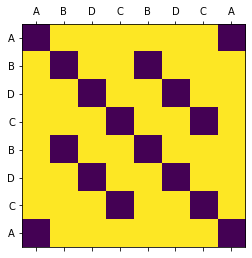

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Make a 9x9 grid...
nrows, ncols = 8, 8

image = []
for i in a:
    for j in a:
        if i == j:
            image.append(0)
        else:
            image.append(1)
            
image = np.array(image)

# Reshape things into a 9x9 grid.
image = image.reshape((nrows, ncols))

row_labels = a
col_labels = a
plt.matshow(image)
plt.xticks(range(ncols), col_labels)
plt.yticks(range(nrows), row_labels)
plt.show()

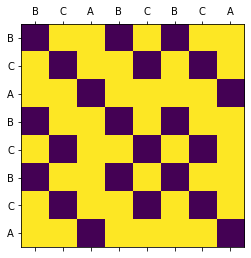

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Make a 9x9 grid...
nrows, ncols = 8, 8

image = []
for i in b:
    for j in b:
        if i == j:
            image.append(0)
        else:
            image.append(1)
            
image = np.array(image)

# Reshape things into a 9x9 grid.
image = image.reshape((nrows, ncols))

row_labels = b
col_labels = b
plt.matshow(image)
plt.xticks(range(ncols), col_labels)
plt.yticks(range(nrows), row_labels)
plt.show()